In [ ]:
from google.colab import drive
from prettytable import PrettyTable
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
drive.mount('/content/drive')
warnings.filterwarnings('ignore')
file_path = '/content/drive/MyDrive/aaa/datasets/db_bench/updaterandom_2/bclt.csv'
num_past_measurements = 20
test_ratio_in_percentage = 50
test_ratio = test_ratio_in_percentage / 100
data = pd.read_csv(file_path)
data = data.head(int(np.round(len(data) * 0.001)))
print('length of data: ', len(data))
data = data.reset_index()
test_size = int(np.round(len(data) * test_ratio))
train_data, test_data = data[:-test_size], data[-test_size:]

Mounted at /content/drive
length of data:  3217


In [ ]:
data.describe()

,index,time,block_id,block_type,block_size,cf_id,level,sst,caller,no_insert,...,key_id,data_size,cache_hit,key_exist,key_count,table_id,sequence_number,block_key_size,key_size,block_offset
count,3217.000000,3.217000e+03,3217.000000,3217.000000,3217.000000,3217.0,3217.0,3217.000000,3217.0,3217.0,...,3217.000000,3217.000000,3217.000000,3217.000000,3217.000000,3217.0,3217.0,3217.0,3217.0,3217.0
mean,1608.000000,1.684919e+15,427.937209,7.999067,141952.935033,0.0,0.0,18.654025,1.0,0.0,...,804.750699,63.940317,0.067143,0.499534,15.985079,1.0,0.0,16.0,28.0,124.0
std,928.812234,1.831275e+04,514.072023,1.000155,138463.983356,0.0,0.0,6.473010,0.0,0.0,...,464.407261,64.009922,0.250309,0.500078,16.002480,0.0,0.0,0.0,0.0,0.0
min,0.000000,1.684919e+15,1.000000,7.000000,4096.000000,0.0,0.0,8.000000,1.0,0.0,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,16.0,28.0,124.0
25%,804.000000,1.684919e+15,29.000000,7.000000,4096.000000,0.0,0.0,13.000000,1.0,0.0,...,403.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,16.0,28.0,124.0
50%,1608.000000,1.684919e+15,99.000000,7.000000,50528.000000,0.0,0.0,19.000000,1.0,0.0,...,805.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,16.0,28.0,124.0
75%,2412.000000,1.684919e+15,825.000000,9.000000,281344.000000,0.0,0.0,24.000000,1.0,0.0,...,1207.000000,128.000000,0.000000,1.000000,32.000000,1.0,0.0,16.0,28.0,124.0
max,3216.000000,1.684919e+15,1624.000000,9.000000,281392.000000,0.0,0.0,30.000000,1.0,0.0,...,1610.000000,128.000000,1.000000,1.000000,32.000000,1.0,0.0,16.0,28.0,124.0


In [ ]:
data.describe().mean()

index              1.724227e+03
time               1.263689e+15
block_id           8.421262e+02
block_type         4.081249e+02
block_size         1.131362e+05
cf_id              4.021250e+02
level              4.021250e+02
sst                4.170159e+02
caller             4.028750e+02
no_insert          4.021250e+02
id                 1.064648e+03
key_id             1.064020e+03
data_size          4.501188e+02
cache_hit          4.022897e+02
key_exist          4.025000e+02
key_count          4.141234e+02
table_id           4.028750e+02
sequence_number    4.021250e+02
block_key_size     4.141250e+02
key_size           4.231250e+02
block_offset       4.951250e+02
dtype: float64

In [ ]:
train_data.describe()

,index,time,block_id,block_type,block_size,cf_id,level,sst,caller,no_insert,...,key_id,data_size,cache_hit,key_exist,key_count,table_id,sequence_number,block_key_size,key_size,block_offset
count,1609.000000,1.609000e+03,1609.00000,1609.000000,1609.000000,1609.0,1609.0,1609.000000,1609.0,1609.0,...,1609.000000,1609.000000,1609.000000,1609.000000,1609.000000,1609.0,1609.0,1609.0,1609.0,1609.0
mean,804.000000,1.684919e+15,227.36793,7.996892,141683.410814,0.0,0.0,18.903667,1.0,0.0,...,402.753884,63.801119,0.062772,0.498446,15.950280,1.0,0.0,16.0,28.0,124.0
std,464.622607,8.845307e+03,256.42511,1.000306,138390.006635,0.0,0.0,6.431038,0.0,0.0,...,232.317899,64.019588,0.242628,0.500153,16.004897,0.0,0.0,0.0,0.0,0.0
min,0.000000,1.684919e+15,1.00000,7.000000,4096.000000,0.0,0.0,8.000000,1.0,0.0,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,16.0,28.0,124.0
25%,402.000000,1.684919e+15,29.00000,7.000000,4096.000000,0.0,0.0,13.000000,1.0,0.0,...,202.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,16.0,28.0,124.0
50%,804.000000,1.684919e+15,61.00000,7.000000,50528.000000,0.0,0.0,19.000000,1.0,0.0,...,403.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,16.0,28.0,124.0
75%,1206.000000,1.684919e+15,423.00000,9.000000,281344.000000,0.0,0.0,25.000000,1.0,0.0,...,604.000000,128.000000,0.000000,1.000000,32.000000,1.0,0.0,16.0,28.0,124.0
max,1608.000000,1.684919e+15,825.00000,9.000000,281392.000000,0.0,0.0,30.000000,1.0,0.0,...,807.000000,128.000000,1.000000,1.000000,32.000000,1.0,0.0,16.0,28.0,124.0


In [ ]:
test_data.describe()

,index,time,block_id,block_type,block_size,cf_id,level,sst,caller,no_insert,...,key_id,data_size,cache_hit,key_exist,key_count,table_id,sequence_number,block_key_size,key_size,block_offset
count,1608.000000,1.608000e+03,1608.000000,1608.000000,1608.000000,1608.0,1608.0,1608.000000,1608.0,1608.0,...,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.0,1608.0,1608.0,1608.0,1608.0
mean,2412.500000,1.684919e+15,628.631219,8.001244,142222.626866,0.0,0.0,18.404229,1.0,0.0,...,1206.997512,64.079602,0.071517,0.500622,16.019900,1.0,0.0,16.0,28.0,124.0
std,464.333932,9.747165e+03,618.460171,1.000310,138580.493378,0.0,0.0,6.507152,0.0,0.0,...,232.175989,64.019860,0.257767,0.500155,16.004965,0.0,0.0,0.0,0.0,0.0
min,1609.000000,1.684919e+15,1.000000,7.000000,4096.000000,0.0,0.0,8.000000,1.0,0.0,...,803.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,16.0,28.0,124.0
25%,2010.750000,1.684919e+15,32.000000,7.000000,4096.000000,0.0,0.0,13.000000,1.0,0.0,...,1006.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,16.0,28.0,124.0
50%,2412.500000,1.684919e+15,586.000000,9.000000,4096.000000,0.0,0.0,18.000000,1.0,0.0,...,1207.000000,128.000000,0.000000,1.000000,32.000000,1.0,0.0,16.0,28.0,124.0
75%,2814.250000,1.684919e+15,1224.250000,9.000000,281344.000000,0.0,0.0,24.000000,1.0,0.0,...,1408.000000,128.000000,0.000000,1.000000,32.000000,1.0,0.0,16.0,28.0,124.0
max,3216.000000,1.684919e+15,1624.000000,9.000000,281392.000000,0.0,0.0,30.000000,1.0,0.0,...,1610.000000,128.000000,1.000000,1.000000,32.000000,1.0,0.0,16.0,28.0,124.0


In [ ]:
table1 = train_data
table2 = test_data

In [ ]:
descriptive_stats_table1 = table1.describe()
descriptive_stats_table2 = table2.describe()


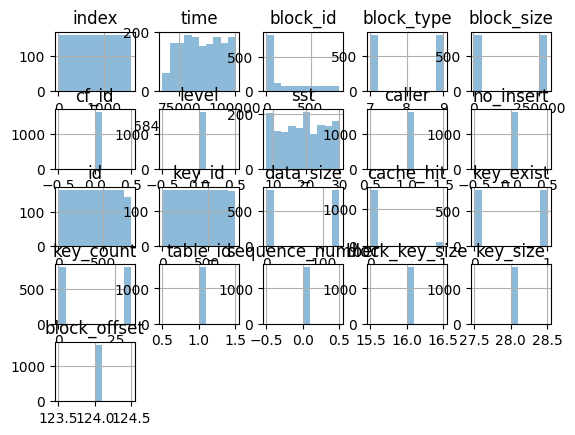

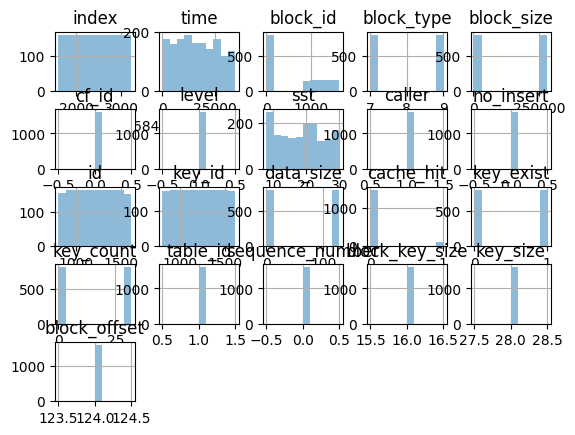

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi histogram
table1.hist(alpha=0.5, label='Table 1')
table2.hist(alpha=0.5, label='Table 2')
plt.legend()
plt.show()


In [ ]:
# Membandingkan mean
mean_table1 = table1.mean()
mean_table2 = table2.mean()

# Membandingkan std
std_table1 = table1.std()
std_table2 = table2.std()

# Membandingkan median
median_table1 = table1.median()
median_table2 = table2.median()


In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu

# Uji t-test (jika datanya normal)
t_stat, p_value = ttest_ind(table1, table2)

# Uji Mann-Whitney U test (jika datanya tidak normal)
U_stat, p_value_mannwhitney = mannwhitneyu(table1, table2)
